In [358]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [359]:
# Import libs
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet, inconsistent
from scipy.spatial.distance import pdist
import pandas as pd
import os, errno
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Prepare data

In [360]:
def calculate_sumcases_bundesland(df_rki):

  state_data = {}
  uni_states = np.unique(df_rki["Bundesland"])

  for state in uni_states:
    #print(state)
    df_state = df_rki[df_rki.Bundesland == state]
    df_state = df_state.sort_values(by=['Meldedatum'])
    df_state = df_state[["AnzahlFall","AnzahlTodesfall","AnzahlGenesen", "NeuerFall", "NeuerTodesfall", "NeuGenesen", "Meldedatum"]].groupby(by="Meldedatum").sum()

    sum_up_fall = 0
    sum_up_todfall = 0
    sum_up_genesen = 0
    sum_up_neufall = 0
    sum_up_neutodfall = 0
    sum_up_neugenesen = 0
    for i in range(len(df_state["AnzahlFall"])):
      sum_up_fall                += df_state["AnzahlFall"][i]
      df_state["AnzahlFall"][i] = sum_up_fall
      sum_up_todfall        += df_state["AnzahlTodesfall"][i]
      df_state["AnzahlTodesfall"][i] = sum_up_todfall
      sum_up_genesen        += df_state["AnzahlGenesen"][i]
      df_state["AnzahlGenesen"][i] = sum_up_genesen
      if i!=0: 
        sum_up_neufall        = df_state["AnzahlFall"][i]-df_state["AnzahlFall"][i-1]
        df_state["NeuerFall"][i] = sum_up_neufall             
        sum_up_neutodfall     = df_state["AnzahlTodesfall"][i]-df_state["AnzahlTodesfall"][i-1]
        df_state["NeuerTodesfall"][i] = sum_up_neutodfall
        sum_up_neugenesen     = df_state["AnzahlGenesen"][i]-df_state["AnzahlGenesen"][i-1]
        df_state["NeuGenesen"] [i] = sum_up_neugenesen
      else:
        sum_up_neufall        = df_state["AnzahlFall"][i]
        df_state["NeuerFall"][i] = sum_up_neufall             
        sum_up_neutodfall     = df_state["AnzahlTodesfall"][i]
        df_state["NeuerTodesfall"][i] = sum_up_neutodfall
        sum_up_neugenesen     = (df_state["AnzahlGenesen"][i])
        df_state["NeuGenesen"] [i] = sum_up_neugenesen
      state_data[state]=df_state       

  return(state_data)

In [361]:
def create_all_statedf(state_data):
  uni_states = list(state_data.keys())
  df = pd.DataFrame()

  for state in uni_states:
    data_dict = {}
    data_dict = { 'State_Cases': state_data[state]["AnzahlFall"], 'State_Deaths': state_data[state]["AnzahlTodesfall"], 'State_Recovered': state_data[state]["AnzahlGenesen"], 'State_newInfections': state_data[state]["NeuerFall"], 'State_newDeaths': state_data[state]["NeuerTodesfall"], 'State_newRecovered': state_data[state]["NeuGenesen"], "State" : np.repeat(state,len(state_data[state]), axis=0)}
    df_state  = pd.DataFrame(data=data_dict)
    df_state  = df_state.reset_index()
    df = df.append(pd.DataFrame(data = df_state), ignore_index=True)

  return(df)

In [362]:
def create_specific_df(df, a):
  if a=="State_Cases":
    BW=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Baden-Württemberg'].Meldedatum.values, 'BW':df_state_data[df_state_data['State']=='Baden-Württemberg'].State_Cases.values}, columns=['Meldedatum', 'BW'])
    BY=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Bayern'].Meldedatum.values, 'BY':df_state_data[df_state_data['State']=='Bayern'].State_Cases.values}, columns=['Meldedatum', 'BY'])
    BE=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Berlin'].Meldedatum.values, 'BE':df_state_data[df_state_data['State']=='Berlin'].State_Cases.values}, columns=['Meldedatum', 'BE'])
    BB=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Brandenburg'].Meldedatum.values, 'BB':df_state_data[df_state_data['State']=='Brandenburg'].State_Cases.values}, columns=['Meldedatum', 'BB'])
    HB=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Bremen'].Meldedatum.values, 'HB':df_state_data[df_state_data['State']=='Bremen'].State_Cases.values}, columns=['Meldedatum', 'HB'])
    HH=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Hamburg'].Meldedatum.values, 'HH':df_state_data[df_state_data['State']=='Hamburg'].State_Cases.values}, columns=['Meldedatum', 'HH'])
    HE=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Hessen'].Meldedatum.values, 'HE':df_state_data[df_state_data['State']=='Hessen'].State_Cases.values}, columns=['Meldedatum', 'HE'])
    MV=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Mecklenburg-Vorpommern'].Meldedatum.values, 'MV':df_state_data[df_state_data['State']=='Mecklenburg-Vorpommern'].State_Cases.values}, columns=['Meldedatum', 'MV'])
    NI=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Niedersachsen'].Meldedatum.values, 'NI':df_state_data[df_state_data['State']=='Niedersachsen'].State_Cases.values}, columns=['Meldedatum', 'NI'])
    NW=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Nordrhein-Westfalen'].Meldedatum.values, 'NW':df_state_data[df_state_data['State']=='Nordrhein-Westfalen'].State_Cases.values}, columns=['Meldedatum', 'NW'])
    RP=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Rheinland-Pfalz'].Meldedatum.values, 'RP':df_state_data[df_state_data['State']=='Rheinland-Pfalz'].State_Cases.values}, columns=['Meldedatum', 'RP'])
    SL=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Saarland'].Meldedatum.values, 'SL':df_state_data[df_state_data['State']=='Saarland'].State_Cases.values}, columns=['Meldedatum', 'SL'])
    SN=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Sachsen'].Meldedatum.values, 'SN':df_state_data[df_state_data['State']=='Sachsen'].State_Cases.values}, columns=['Meldedatum', 'SN'])
    ST=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Sachsen-Anhalt'].Meldedatum.values, 'ST':df_state_data[df_state_data['State']=='Sachsen-Anhalt'].State_Cases.values}, columns=['Meldedatum', 'ST'])
    SH=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Schleswig-Holstein'].Meldedatum.values, 'SH':df_state_data[df_state_data['State']=='Schleswig-Holstein'].State_Cases.values}, columns=['Meldedatum', 'SH'])
    TH=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Thüringen'].Meldedatum.values, 'TH':df_state_data[df_state_data['State']=='Thüringen'].State_Cases.values}, columns=['Meldedatum', 'TH'])
  if a=="State_Deaths":
    BW=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Baden-Württemberg'].Meldedatum.values, 'BW':df_state_data[df_state_data['State']=='Baden-Württemberg'].State_Deaths.values}, columns=['Meldedatum', 'BW'])
    BY=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Bayern'].Meldedatum.values, 'BY':df_state_data[df_state_data['State']=='Bayern'].State_Deaths.values}, columns=['Meldedatum', 'BY'])
    BE=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Berlin'].Meldedatum.values, 'BE':df_state_data[df_state_data['State']=='Berlin'].State_Deaths.values}, columns=['Meldedatum', 'BE'])
    BB=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Brandenburg'].Meldedatum.values, 'BB':df_state_data[df_state_data['State']=='Brandenburg'].State_Deaths.values}, columns=['Meldedatum', 'BB'])
    HB=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Bremen'].Meldedatum.values, 'HB':df_state_data[df_state_data['State']=='Bremen'].State_Deaths.values}, columns=['Meldedatum', 'HB'])
    HH=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Hamburg'].Meldedatum.values, 'HH':df_state_data[df_state_data['State']=='Hamburg'].State_Deaths.values}, columns=['Meldedatum', 'HH'])
    HE=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Hessen'].Meldedatum.values, 'HE':df_state_data[df_state_data['State']=='Hessen'].State_Deaths.values}, columns=['Meldedatum', 'HE'])
    MV=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Mecklenburg-Vorpommern'].Meldedatum.values, 'MV':df_state_data[df_state_data['State']=='Mecklenburg-Vorpommern'].State_Deaths.values}, columns=['Meldedatum', 'MV'])
    NI=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Niedersachsen'].Meldedatum.values, 'NI':df_state_data[df_state_data['State']=='Niedersachsen'].State_Deaths.values}, columns=['Meldedatum', 'NI'])
    NW=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Nordrhein-Westfalen'].Meldedatum.values, 'NW':df_state_data[df_state_data['State']=='Nordrhein-Westfalen'].State_Deaths.values}, columns=['Meldedatum', 'NW'])
    RP=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Rheinland-Pfalz'].Meldedatum.values, 'RP':df_state_data[df_state_data['State']=='Rheinland-Pfalz'].State_Deaths.values}, columns=['Meldedatum', 'RP'])
    SL=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Saarland'].Meldedatum.values, 'SL':df_state_data[df_state_data['State']=='Saarland'].State_Deaths.values}, columns=['Meldedatum', 'SL'])
    SN=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Sachsen'].Meldedatum.values, 'SN':df_state_data[df_state_data['State']=='Sachsen'].State_Deaths.values}, columns=['Meldedatum', 'SN'])
    ST=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Sachsen-Anhalt'].Meldedatum.values, 'ST':df_state_data[df_state_data['State']=='Sachsen-Anhalt'].State_Deaths.values}, columns=['Meldedatum', 'ST'])
    SH=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Schleswig-Holstein'].Meldedatum.values, 'SH':df_state_data[df_state_data['State']=='Schleswig-Holstein'].State_Deaths.values}, columns=['Meldedatum', 'SH'])
    TH=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Thüringen'].Meldedatum.values, 'TH':df_state_data[df_state_data['State']=='Thüringen'].State_Deaths.values}, columns=['Meldedatum', 'TH'])
  if a=="State_Recovered":
    BW=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Baden-Württemberg'].Meldedatum.values, 'BW':df_state_data[df_state_data['State']=='Baden-Württemberg'].State_Recovered.values}, columns=['Meldedatum', 'BW'])
    BY=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Bayern'].Meldedatum.values, 'BY':df_state_data[df_state_data['State']=='Bayern'].State_Recovered.values}, columns=['Meldedatum', 'BY'])
    BE=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Berlin'].Meldedatum.values, 'BE':df_state_data[df_state_data['State']=='Berlin'].State_Recovered.values}, columns=['Meldedatum', 'BE'])
    BB=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Brandenburg'].Meldedatum.values, 'BB':df_state_data[df_state_data['State']=='Brandenburg'].State_Recovered.values}, columns=['Meldedatum', 'BB'])
    HB=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Bremen'].Meldedatum.values, 'HB':df_state_data[df_state_data['State']=='Bremen'].State_Recovered.values}, columns=['Meldedatum', 'HB'])
    HH=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Hamburg'].Meldedatum.values, 'HH':df_state_data[df_state_data['State']=='Hamburg'].State_Recovered.values}, columns=['Meldedatum', 'HH'])
    HE=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Hessen'].Meldedatum.values, 'HE':df_state_data[df_state_data['State']=='Hessen'].State_Recovered.values}, columns=['Meldedatum', 'HE'])
    MV=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Mecklenburg-Vorpommern'].Meldedatum.values, 'MV':df_state_data[df_state_data['State']=='Mecklenburg-Vorpommern'].State_Recovered.values}, columns=['Meldedatum', 'MV'])
    NI=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Niedersachsen'].Meldedatum.values, 'NI':df_state_data[df_state_data['State']=='Niedersachsen'].State_Recovered.values}, columns=['Meldedatum', 'NI'])
    NW=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Nordrhein-Westfalen'].Meldedatum.values, 'NW':df_state_data[df_state_data['State']=='Nordrhein-Westfalen'].State_Recovered.values}, columns=['Meldedatum', 'NW'])
    RP=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Rheinland-Pfalz'].Meldedatum.values, 'RP':df_state_data[df_state_data['State']=='Rheinland-Pfalz'].State_Recovered.values}, columns=['Meldedatum', 'RP'])
    SL=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Saarland'].Meldedatum.values, 'SL':df_state_data[df_state_data['State']=='Saarland'].State_Recovered.values}, columns=['Meldedatum', 'SL'])
    SN=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Sachsen'].Meldedatum.values, 'SN':df_state_data[df_state_data['State']=='Sachsen'].State_Recovered.values}, columns=['Meldedatum', 'SN'])
    ST=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Sachsen-Anhalt'].Meldedatum.values, 'ST':df_state_data[df_state_data['State']=='Sachsen-Anhalt'].State_Recovered.values}, columns=['Meldedatum', 'ST'])
    SH=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Schleswig-Holstein'].Meldedatum.values, 'SH':df_state_data[df_state_data['State']=='Schleswig-Holstein'].State_Recovered.values}, columns=['Meldedatum', 'SH'])
    TH=pd.DataFrame({'Meldedatum':df_state_data[df_state_data['State']=='Thüringen'].Meldedatum.values, 'TH':df_state_data[df_state_data['State']=='Thüringen'].State_Recovered.values}, columns=['Meldedatum', 'TH'])
  me=BW.merge(BY, on='Meldedatum')
  me=me.merge(BE, on='Meldedatum')
  me=me.merge(BB, on='Meldedatum')
  me=me.merge(HB, on='Meldedatum')
  me=me.merge(HH, on='Meldedatum')
  me=me.merge(HE, on='Meldedatum')
  me=me.merge(MV, on='Meldedatum')
  me=me.merge(NI, on='Meldedatum')
  me=me.merge(NW, on='Meldedatum')
  me=me.merge(RP, on='Meldedatum')
  me=me.merge(SL, on='Meldedatum')
  me=me.merge(SN, on='Meldedatum')
  me=me.merge(ST, on='Meldedatum')
  me=me.merge(SH, on='Meldedatum')
  me=me.merge(TH, on='Meldedatum')
  return me

In [363]:
# Read in data and names of data
#data = pd.read_csv('https://raw.githubusercontent.com/jgehrcke/covid-19-germany-gae/master/cases-rki-by-state.csv', parse_dates=['time_iso8601'], squeeze=True)
df_rki = pd.read_csv('https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv', parse_dates=['Meldedatum'], squeeze=True)
np.unique(df_rki["Bundesland"])
state_data = calculate_sumcases_bundesland(df_rki)
df_state_data = create_all_statedf(state_data)
pd.set_option('display.max_rows', df_state_data.shape[0]+1)
a="State_Cases"
X=(create_specific_df(df_state_data, a)).T
X.columns = X.iloc[0]
X=X.drop(X.index[0])
a="State_Deaths"
dX=(create_specific_df(df_state_data, a)).T
dX.columns=dX.iloc[0]
dX=dX.drop(dX.index[0])
dX
a="State_Recovered"
rX=(create_specific_df(df_state_data, a)).T
rX.columns=rX.iloc[0]
rX=rX.drop(rX.index[0])
rX

Meldedatum,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-20,2020-04-21,2020-04-22,2020-04-24,2020-04-25,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-09,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-19,2020-05-20,2020-05-29,2020-06-05,2020-06-09,2020-06-10,2020-06-12,2020-06-15,2020-06-16,2020-06-19
BW,392,533,717,1027,1344,1939,2526,3308,3943,4760,5306,5834,6451,7595,8737,9881,11083,12031,12660,13534,14679,15833,17149,18339,19147,19609,20129,20980,21844,22775,23398,24110,24495,24753,25093,25669,26298,26824,27196,27723,28099,28580,29330,29625,29919,30093,30357,30601,30745,30846,30967,31086,31206,31382,31698,31844,31937,32056,32154,32254,32306,32462,32545,32923,33027,33071,33089,33094,33098,33099,33100
BY,349,465,595,842,1067,1492,1947,2675,3485,4318,5384,5922,6595,7766,9378,10990,12563,13895,14710,15672,17385,19272,21083,22847,24259,24922,25975,27411,28869,30048,30930,31625,31999,32418,33105,33998,34804,35529,36014,36704,37172,37735,38772,39062,39557,39901,40180,40459,40660,40789,41034,41238,41491,41707,42023,42273,42478,42658,42862,42988,43083,43325,43511,44281,44542,44623,44638,44652,44665,44669,44676
BE,92,134,181,240,269,358,451,595,774,942,1068,1135,1290,1485,1728,2010,2210,2404,2487,2650,2860,3039,3269,3491,3596,3669,3804,3991,4163,4326,4403,4488,4541,4597,4670,4781,4872,4986,5063,5138,5212,5286,5440,5488,5554,5627,5695,5748,5773,5802,5885,5937,5994,6051,6071,6093,6129,6187,6231,6247,6263,6346,6393,6579,6753,6826,6860,6886,6894,6897,6906
BB,21,29,54,75,89,130,195,242,296,359,383,405,458,513,605,677,751,795,822,905,1026,1091,1207,1330,1368,1390,1458,1558,1673,1778,1850,1894,1932,1944,1997,2054,2110,2219,2276,2351,2415,2465,2586,2609,2651,2716,2752,2785,2817,2833,2856,2900,2926,2938,2960,2973,2979,2988,3004,3011,3024,3035,3048,3104,3123,3135,3136,3139,3141,3142,3142
HB,22,33,40,49,52,56,67,77,117,141,163,167,179,197,208,237,256,281,282,288,304,319,329,357,371,374,379,413,419,435,443,454,458,461,468,482,526,537,554,573,586,694,728,743,764,805,847,869,881,885,919,928,982,1010,1050,1064,1084,1112,1135,1156,1174,1213,1231,1355,1455,1482,1491,1499,1502,1503,1505
HH,76,105,146,183,259,419,551,685,873,1017,1123,1271,1403,1607,1759,1924,2056,2191,2306,2373,2524,2654,2808,2944,3051,3150,3235,3426,3534,3645,3741,3816,3854,3889,3957,4035,4100,4200,4239,4289,4344,4390,4473,4513,4546,4570,4610,4634,4642,4655,4663,4682,4702,4719,4741,4748,4750,4764,4773,4786,4792,4796,4809,4825,4838,4841,4841,4843,4843,4844,4845
HE,62,99,136,214,295,444,611,834,1036,1244,1376,1434,1707,1933,2175,2464,2758,2938,3067,3241,3483,3789,4033,4271,4478,4564,4682,4919,5203,5463,5604,5740,5827,5893,6039,6253,6446,6627,6743,6879,7039,7203,7416,7501,7588,7723,7844,7942,8018,8057,8107,8195,8296,8375,8502,8547,8626,8694,8741,8807,8840,9045,9143,9508,9639,9696,9707,9715,9723,9723,9730
MV,12,20,29,38,39,54,85,128,162,178,189,190,203,239,262,286,327,346,357,370,418,438,464,495,510,512,517,549,557,572,582,595,598,602,604,615,624,628,633,635,637,641,647,653,654,667,671,675,679,681,685,692,695,701,705,711,715,719,724,726,727,730,738,741,747,752,752,754,754,754,754
NI,87,149,217,306,383,606,781,1053,1322,1582,1758,1867,2106,2397,2757,3120,3494,3814,3976,4269,4615,4962,5274,5633,5838,5975,6179,6534,6842,7137,7382,7501,7639,7708,7857,8064,8296,8482,8618,8826,8979,9134,9377,9441,9556,9649,9727,9804,9843,9879,9981,10054,10143,10228,10330,10386,10432,10508,10547,10587,10606,10739,10832,11302,11659,11776,11795,11805,11815,11819,11820
NW,747,945,1223,1635,1954,2788,3685,4383,5501,6356,7031,7447,8303

# Cluster training data
### Clustering

In [364]:
# choose method and metric
# hierarchical clustering
Z = linkage(X)
c, coph_dists = cophenet(Z, pdist(X))
c

0.9683895461230534

In [365]:
dZ = linkage(dX)
dc, dcoph_dists = cophenet(dZ, pdist(dX))
dc

0.9508612820851129

In [366]:
rZ = linkage(rX)
rc, rcoph_dists = cophenet(rZ, pdist(rX))
rc

0.9688597872532307

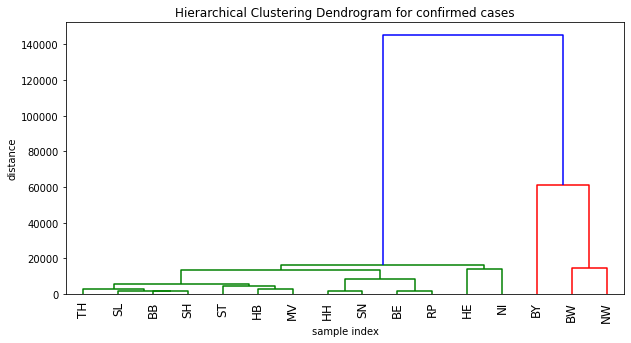

In [367]:
# calculate full dendrogram
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram for confirmed cases')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    #truncate_mode='lastp',  # show only the last p merged clusters
    #p=20,  # show only the last p merged clusters
    leaf_rotation=90.,  # rotates the x axis labels
    #orientation='left',
    leaf_font_size=12.,  # font size for the x axis labels
    labels=X.index.values
)
plt.show()
#plt.savefig("hconfirmed")


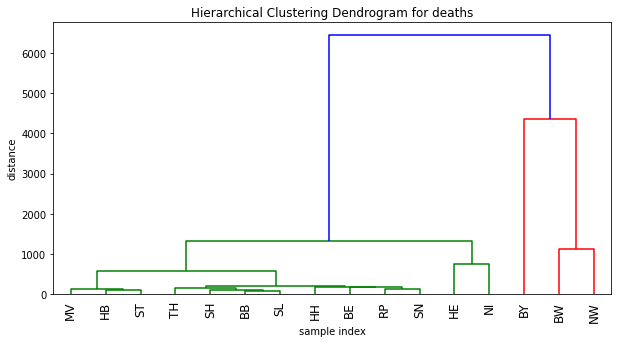

In [368]:
# calculate full dendrogram
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram for deaths')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    dZ,
    #truncate_mode='lastp',  # show only the last p merged clusters
    #p=20,  # show only the last p merged clusters
    leaf_rotation=90.,  # rotates the x axis labels
    #orientation='left',
    leaf_font_size=12.,  # font size for the x axis labels
    labels=dX.index.values
)
plt.show()
#plt.savefig("hdeath")


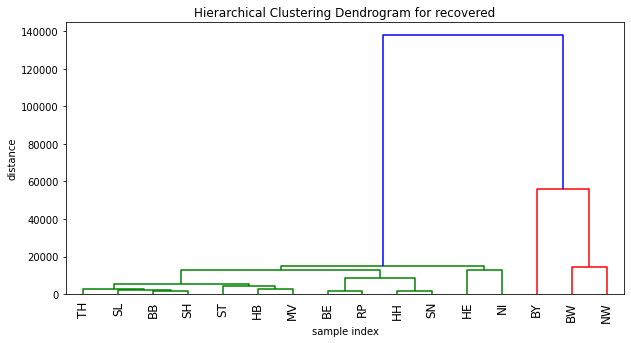

In [369]:
# calculate full dendrogram
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram for recovered')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    rZ,
    #truncate_mode='lastp',  # show only the last p merged clusters
    #p=20,  # show only the last p merged clusters
    leaf_rotation=90.,  # rotates the x axis labels
    #orientation='left',
    leaf_font_size=12.,  # font size for the x axis labels
    labels=rX.index.values
)
plt.show()
#plt.savefig("hdeath")

In [370]:
mms = StandardScaler()
mms.fit(X)
data_transformed = mms.transform(X)
data_transformed

array([[ 1.3746062 ,  1.46877002,  1.52585695, ...,  1.62162875,
         1.61847896,  1.59562992],
       [ 1.1438329 ,  1.17353987,  1.12873703, ...,  2.48328106,
         2.47867621,  2.45102881],
       [-0.16555476, -0.14909123, -0.16037536, ..., -0.29631377,
        -0.29290977, -0.27738695],
       ...,
       [-0.59700051, -0.59390466, -0.60637158, ..., -0.68393307,
        -0.68398991, -0.68313911],
       [-0.53178196, -0.52698583, -0.54222144, ..., -0.59110046,
        -0.59210881, -0.59494101],
       [-0.57191645, -0.62933228, -0.64302881, ..., -0.5868902 ,
        -0.58694308, -0.58942011]])

In [371]:
mms = StandardScaler()
mms.fit(dX)
ddata_transformed = mms.transform(dX)
ddata_transformed

array([[ 2.07349055,  2.63772292,  2.63163591, ...,  1.71978299,
         1.71940599,  1.7193321 ],
       [ 0.96762892,  0.81411201,  1.05018334, ...,  2.72681581,
         2.72631723,  2.72624968],
       [-0.50685325, -0.48846721, -0.53126922, ..., -0.46641342,
        -0.46652651, -0.46661414],
       ...,
       [-0.50685325, -0.48846721, -0.53126922, ..., -0.67513893,
        -0.67522682, -0.67531577],
       [-0.50685325, -0.48846721, -0.33358765, ..., -0.54637968,
        -0.54648312, -0.54657126],
       [-0.50685325, -0.48846721, -0.53126922, ..., -0.51114031,
        -0.51124801, -0.51133592]])

In [372]:
mms = StandardScaler()
mms.fit(rX)
rdata_transformed = mms.transform(rX)
rdata_transformed

array([[ 1.36446067,  1.44925048,  1.50680115, ...,  1.62988886,
         1.62965146,  1.62912953],
       [ 1.14584191,  1.17776554,  1.12869653, ...,  2.4811616 ,
         2.48104498,  2.48076866],
       [-0.16078647, -0.14372732, -0.15437981, ..., -0.29859309,
        -0.29845685, -0.29794679],
       ...,
       [-0.59802398, -0.59487141, -0.60686567, ..., -0.68297949,
        -0.68301886, -0.68308249],
       [-0.53192994, -0.52700018, -0.5448813 , ..., -0.58804201,
        -0.58809253, -0.58817799],
       [-0.5726032 , -0.63080324, -0.64405628, ..., -0.59047065,
        -0.5904473 , -0.59053221]])

In [373]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

In [374]:
dSum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(ddata_transformed)
    dSum_of_squared_distances.append(km.inertia_)

In [375]:
rSum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(rdata_transformed)
    rSum_of_squared_distances.append(km.inertia_)

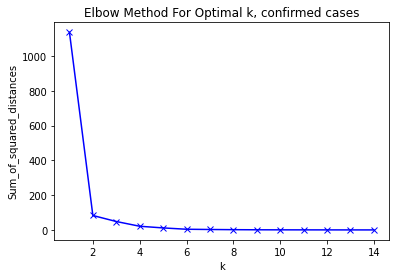

In [389]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k, confirmed cases')
plt.show()

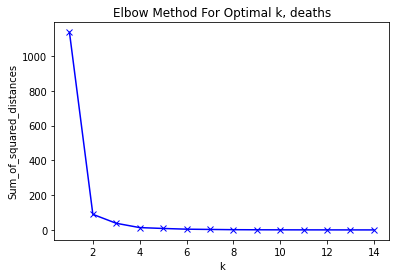

In [390]:
plt.plot(K, dSum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k, deaths')
plt.show()

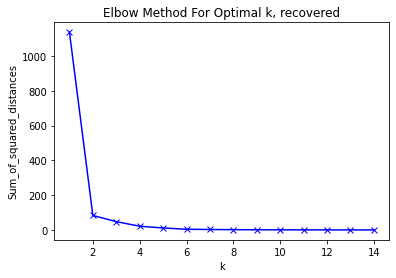

In [391]:
plt.plot(K, rSum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k, recovered')
plt.show()

In [379]:
clusterer = KMeans(n_clusters=6)
clusterer.fit(X)
dclusterer = KMeans(n_clusters=5)
dclusterer.fit(dX)
rclusterer = KMeans(n_clusters=6)
rclusterer.fit(rX)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [380]:
centroids = clusterer.cluster_centers_
dcentroids = dclusterer.cluster_centers_
rcentroids = rclusterer.cluster_centers_
#centroids

In [381]:
df=X.copy()
df['k_means']=clusterer.predict(df)
ddf=dX.copy()
ddf['k_means']=dclusterer.predict(ddf)
rdf=rX.copy()
rdf['k_means']=rclusterer.predict(rdf)

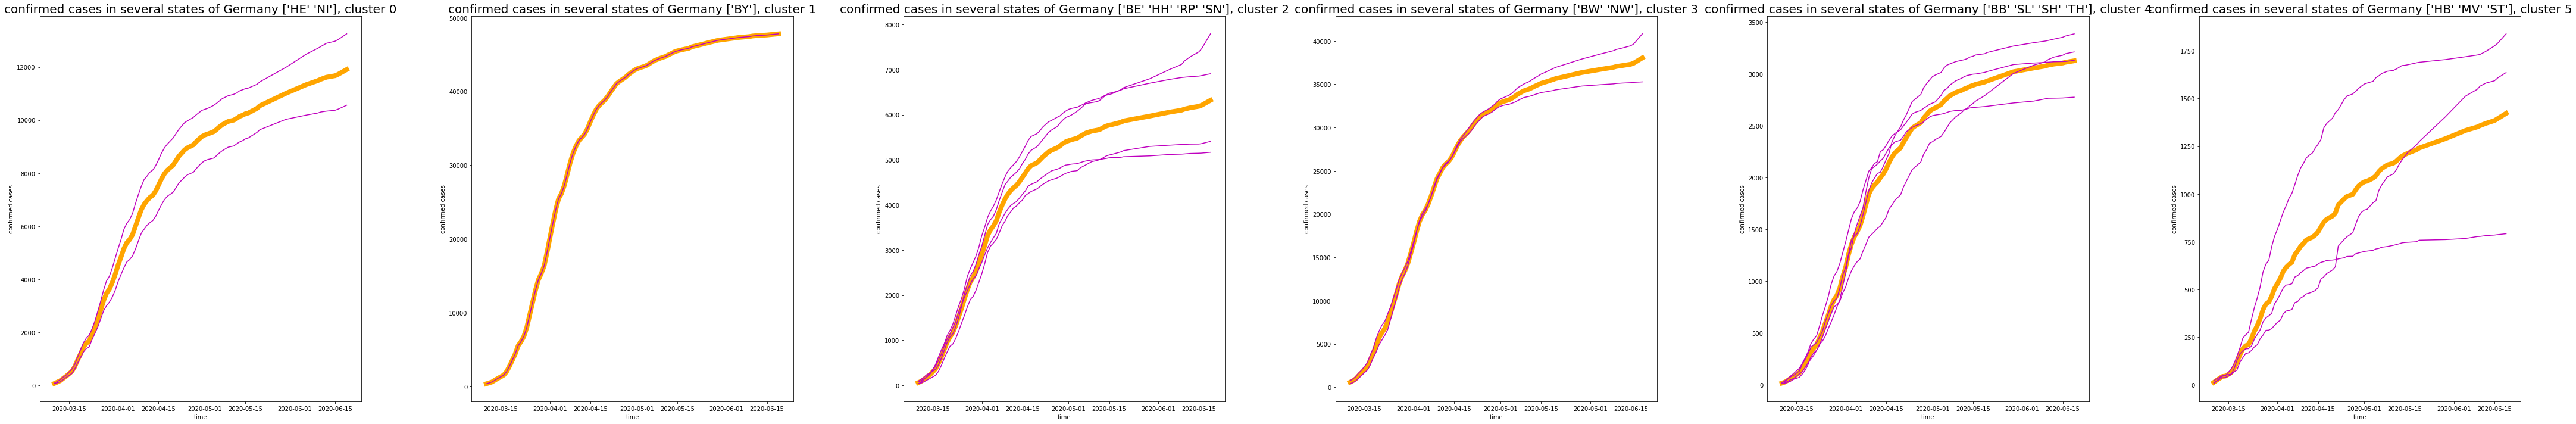

In [382]:
fig, axs = plt.subplots(1,len(centroids), figsize=(60, 10), facecolor='w', edgecolor='k', sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(0,len(centroids)):
  axs[i].plot(X.columns, centroids[i], '-', color='orange', linewidth=8)
  for j in (df[df['k_means']==i].index):
    axs[i].plot(X.columns, X.loc[j].values, 'm-', label=j )
  axs[i].set_xlabel('time')
  axs[i].set_ylabel('confirmed cases')
  axs[i].set_title('confirmed cases in several states of Germany {}, cluster {}'.format(df[df['k_means']==i].index.values, i), fontsize=20)
plt.tight_layout()
plt.show()

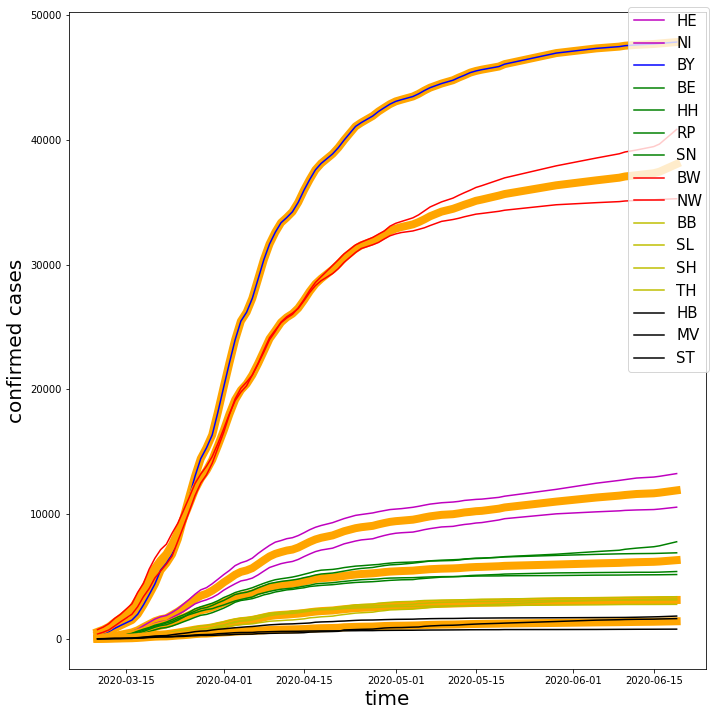

In [383]:
f = plt.figure(figsize=(10,10))
ax = plt.axes()
for i in range(0,len(centroids)):
  plt.plot(X.columns, centroids[i], '-', color='orange', linewidth=8)
  for j in (df[df['k_means']==i].index):
    if i==0:
      plt.plot(X.columns, X.loc[j].values, 'm-', linewidth=1.5, label=j)
    if i==1:
      plt.plot(X.columns, X.loc[j].values, 'b-', linewidth=1.5, label=j)
    if i==2:
      plt.plot(X.columns, X.loc[j].values, 'g-', linewidth=1.5, label=j)
    if i==3:
      plt.plot(X.columns, X.loc[j].values, 'r-', linewidth=1.5, label=j)
    if i==4:
      plt.plot(X.columns, X.loc[j].values, 'y-', linewidth=1.5, label=j)
    if i==5:
      plt.plot(X.columns, X.loc[j].values, 'k-', linewidth=1.5, label=j)                
  ax.set_xlabel('time', fontsize=20)
  ax.set_ylabel('confirmed cases', fontsize=20)
  #ax.set_title('confirmed cases in several states of Germany {}, cluster {}'.format(df[df['k_means']==i].index.values, i), fontsize=20)
f.legend(loc='upper right', prop={'size': 15})  
plt.tight_layout()
plt.show()

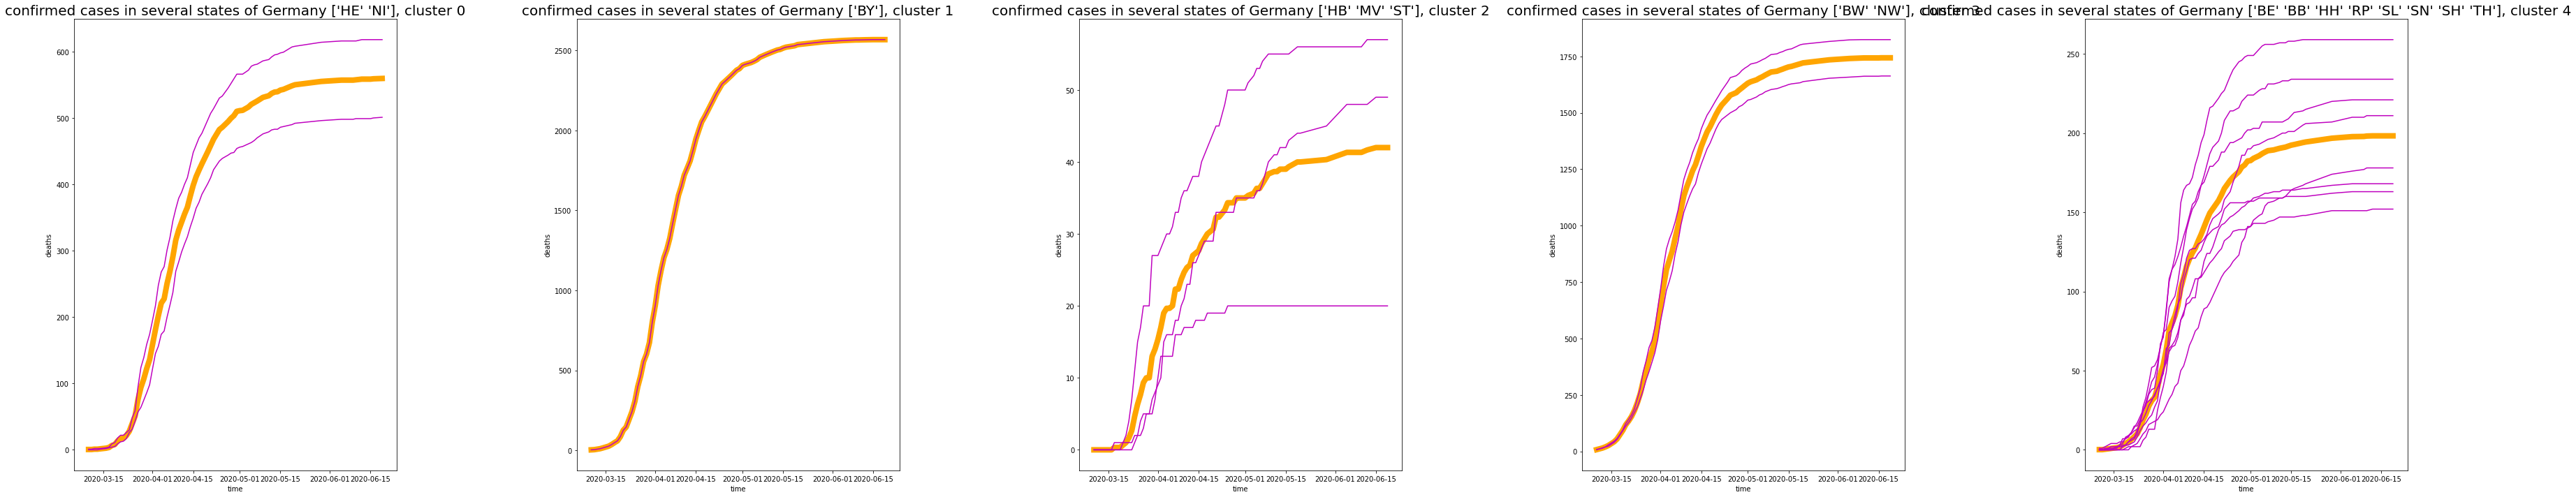

In [384]:
fig, axs = plt.subplots(1, len(dcentroids), figsize=(50, 10), facecolor='w', edgecolor='k', sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
#axs = axs.ravel()
for i in range(0, len(dcentroids)):
  axs[i].plot(dX.columns, dcentroids[i], '-', color='orange', linewidth=8)
  for j in (ddf[ddf['k_means']==i].index):
    axs[i].plot(dX.columns, dX.loc[j].values, 'm-', label=j )
  axs[i].set_xlabel('time')
  axs[i].set_ylabel('deaths')
  axs[i].set_title('confirmed cases in several states of Germany {}, cluster {}'.format(ddf[ddf['k_means']==i].index.values, i), fontsize=20)
plt.tight_layout()
plt.show()

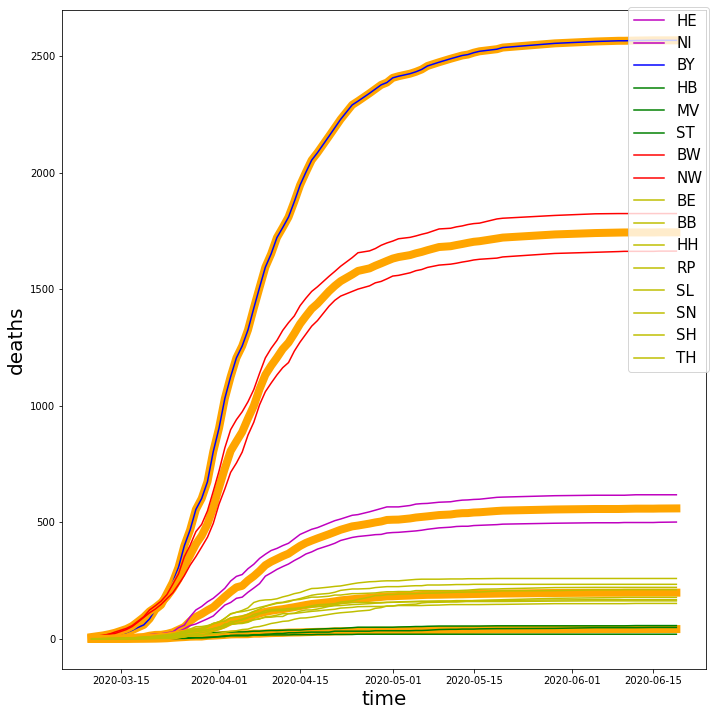

In [385]:
f = plt.figure(figsize=(10,10))
ax = plt.axes()
for i in range(0,len(dcentroids)):
  plt.plot(dX.columns, dcentroids[i], '-', color='orange', linewidth=8)
  for j in (ddf[ddf['k_means']==i].index):
    if i==0:
      plt.plot(dX.columns, dX.loc[j].values, 'm-', linewidth=1.5, label=j)
    if i==1:
      plt.plot(dX.columns, dX.loc[j].values, 'b-', linewidth=1.5, label=j)
    if i==2:
      plt.plot(dX.columns, dX.loc[j].values, 'g-', linewidth=1.5, label=j)
    if i==3:
      plt.plot(dX.columns, dX.loc[j].values, 'r-', linewidth=1.5, label=j)
    if i==4:
      plt.plot(dX.columns, dX.loc[j].values, 'y-', linewidth=1.5, label=j)      
  ax.set_xlabel('time', fontsize=20)
  ax.set_ylabel('deaths', fontsize=20)
 # ax.set_title('confirmed cases in several states of Germany {}, cluster {}'.format(ddf[ddf['k_means']==i].index.values, i), fontsize=20)
f.legend(loc='upper right', prop={'size': 15})
plt.tight_layout()
plt.show()

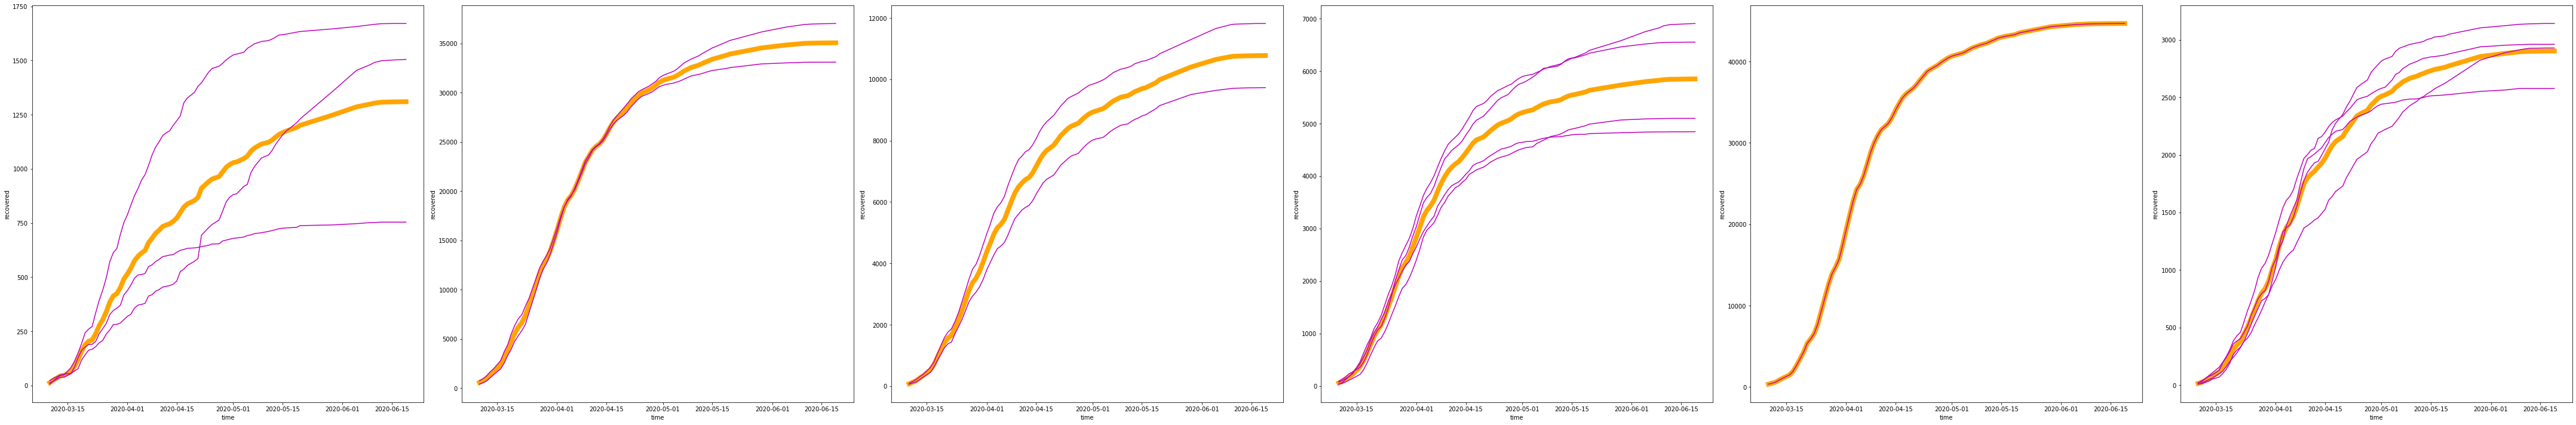

In [386]:
fig, axs = plt.subplots(1, len(rcentroids), figsize=(60, 10), facecolor='w', edgecolor='k', sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
#axs = axs.ravel()
for i in range(0, len(rcentroids)):
  axs[i].plot(rX.columns, rcentroids[i], '-', color='orange', linewidth=8)
  for j in (rdf[rdf['k_means']==i].index):
    axs[i].plot(rX.columns, rX.loc[j].values, 'm-', label=j )
  axs[i].set_xlabel('time')
  axs[i].set_ylabel('recovered')
  #axs[i].set_title('confirmed cases in several states of Germany {}, cluster {}'.format(rdf[rdf['k_means']==i].index.values, i), fontsize=20)
plt.tight_layout()
plt.show()

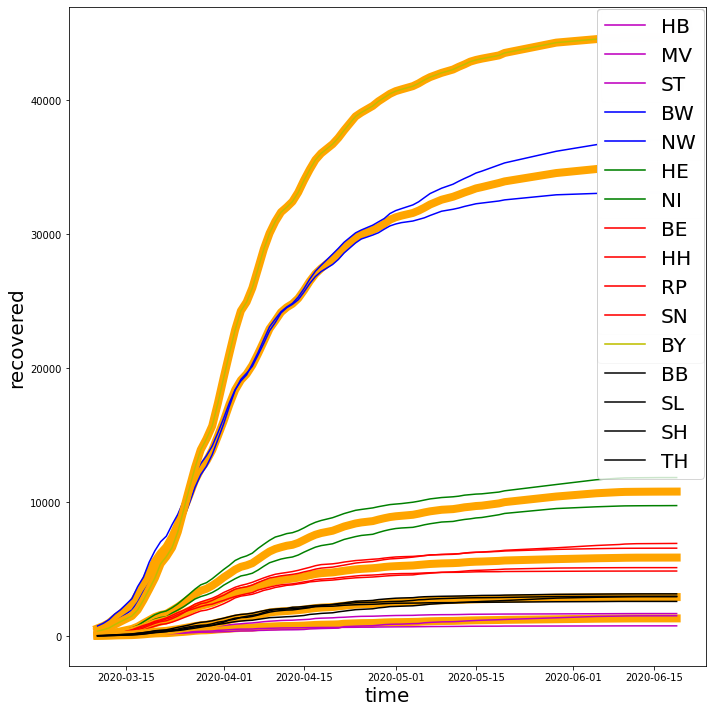

In [387]:
f = plt.figure(figsize=(10,10))
ax = plt.axes()
for i in range(0,len(rcentroids)):
  plt.plot(rX.columns, rcentroids[i], '-', color='orange', linewidth=8)
  for j in (rdf[rdf['k_means']==i].index):
    if i==0:
      plt.plot(rX.columns, rX.loc[j].values, 'm-', linewidth=1.5, label=j)
    if i==1:
      plt.plot(rX.columns, rX.loc[j].values, 'b-', linewidth=1.5, label=j)
    if i==2:
      plt.plot(rX.columns, rX.loc[j].values, 'g-', linewidth=1.5, label=j)
    if i==3:
      plt.plot(rX.columns, rX.loc[j].values, 'r-', linewidth=1.5, label=j)
    if i==4:
      plt.plot(rX.columns, rX.loc[j].values, 'y-', linewidth=1.5, label=j)
    if i==5:
      plt.plot(X.columns, rX.loc[j].values, 'k-', linewidth=1.5, label=j)                
  ax.set_xlabel('time', fontsize=20)
  ax.set_ylabel('recovered', fontsize=20)
 # ax.set_title('confirmed cases in several states of Germany {}, cluster {}'.format(df[df['k_means']==i].index.values, i), fontsize=20)
  f.legend(loc='upper right', prop={'size': 20})
plt.tight_layout()
plt.show()

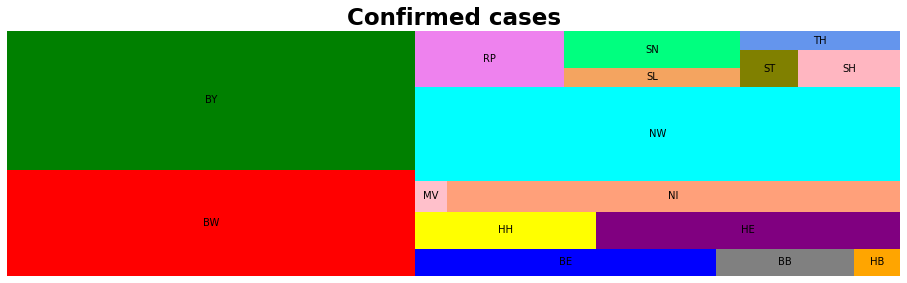

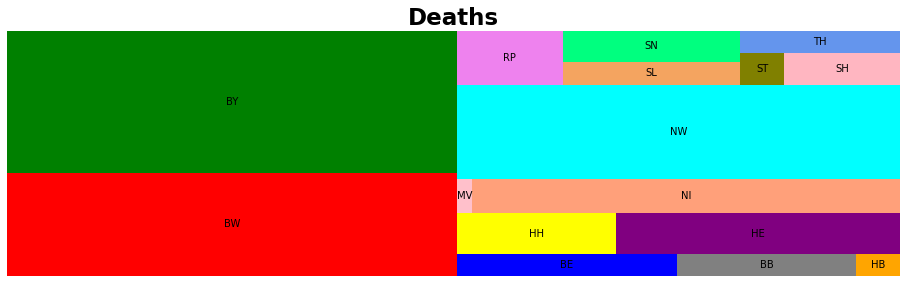

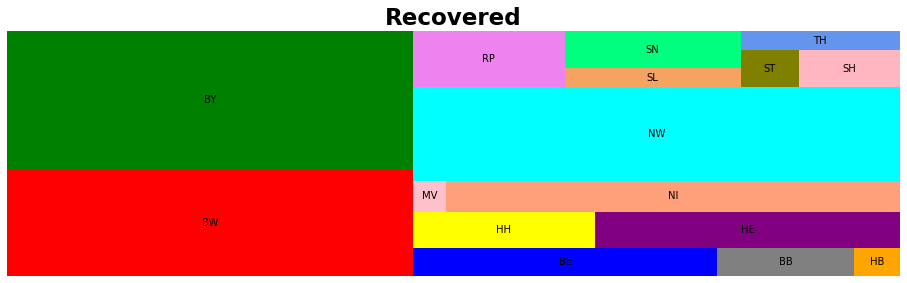

In [388]:
%pip install squarify
# libraries
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
import matplotlib 
df["sum"]=df[list(df)].sum(axis=1)
cmap = matplotlib.cm.Blues
mini=min(df["sum"])
maxi=max(df["sum"])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in df["sum"]]

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)

squarify.plot(sizes=df["sum"], label=df.index.values, color=["red","green","blue", "grey", "orange", "yellow", "purple", "pink", "lightsalmon", "cyan", "violet", "sandybrown", "springgreen", "olive", "lightpink", "cornflowerblue"], alpha=1 )
plt.title("Confirmed cases",fontsize=23,fontweight="bold")
plt.axis('off')
plt.show()
ddf["sum"]=ddf[list(ddf)].sum(axis=1)
cmap = matplotlib.cm.Reds
mini=min(ddf["sum"])
maxi=max(ddf["sum"])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
dcolors = [cmap(norm(value)) for value in ddf["sum"]]
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)
squarify.plot(sizes=ddf["sum"], label=ddf.index.values, color=["red","green","blue", "grey", "orange", "yellow", "purple", "pink", "lightsalmon", "cyan", "violet", "sandybrown", "springgreen", "olive", "lightpink", "cornflowerblue"], alpha=1 )
plt.title("Deaths",fontsize=23,fontweight="bold")
plt.axis('off')
plt.show()
rdf["sum"]=rdf[list(rdf)].sum(axis=1)
cmap = matplotlib.cm.Greens
mini=min(rdf["sum"])
maxi=max(rdf["sum"])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
rcolors = [cmap(norm(value)) for value in rdf["sum"]]
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)
squarify.plot(sizes=rdf["sum"], label=rdf.index.values, color=["red","green","blue", "grey", "orange", "yellow", "purple", "pink", "lightsalmon", "cyan", "violet", "sandybrown", "springgreen", "olive", "lightpink", "cornflowerblue"], alpha=1)
plt.title("Recovered",fontsize=23,fontweight="bold")
plt.axis('off')
plt.show()